# Explore Bitcoin Profile

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
# Reading datasets
df = pd.read_csv(r"C:\Users\karim\Desktop\coinmarketcap_06122017.csv",index_col=0)

In [32]:
df.head()

,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
0,9.007640e+09,1.672352e+07,bitcoin,1512549554,2.130493e+11,2.100000e+07,Bitcoin,0.12,7.33,17.45,1.000000,12739.500000,1,BTC,1.672352e+07
1,1.551330e+09,9.616537e+07,ethereum,1512549553,4.352945e+10,NaN,Ethereum,-0.18,-3.93,-7.33,0.036177,452.652000,2,ETH,9.616537e+07
2,1.111350e+09,1.684044e+07,bitcoin-cash,1512549578,2.529585e+10,2.100000e+07,Bitcoin Cash,1.65,-5.51,-4.75,0.120050,1502.090000,3,BCH,1.684044e+07
3,2.936090e+09,2.779530e+09,iota,1512549571,1.475225e+10,2.779530e+09,IOTA,-2.38,83.35,255.82,0.000424,5.307460,4,MIOTA,2.779530e+09
4,2.315050e+08,3.873915e+10,ripple,1512549541,9.365343e+09,1.000000e+11,Ripple,0.56,-3.70,-14.79,0.000019,0.241754,5,XRP,9.999309e+10


In [33]:
market_cap = df[['id','market_cap_usd']]

In [34]:
# Clean data 
market_cap.count()

id                1326
market_cap_usd    1031
dtype: int64

In [39]:
market_cap.market_cap_usd.isna().sum()

295

some cryptocurrencies have no known market capitalization, this is represented by NaN in the data, and NaNs are not counted by count(). These cryptocurrencies are of little interest to us in this analysis

In [58]:
# 1
one = market_cap.market_cap_usd.dropna()

In [59]:
one.count()

1031

In [55]:
# or 2 
df = market_cap[market_cap['market_cap_usd'] > 0]

In [56]:
df.count()

id                1031
market_cap_usd    1031
dtype: int64

In [57]:
df

,id,market_cap_usd
0,bitcoin,2.130493e+11
1,ethereum,4.352945e+10
2,bitcoin-cash,2.529585e+10
3,iota,1.475225e+10
4,ripple,9.365343e+09
...,...,...
1026,future-digital-currency,2.510000e+02
1027,environ,1.360000e+02
1028,caliphcoin,1.000000e+02
1029,falcoin,2.300000e+01


# CryptoCurr Comparison 

In [60]:
# Selecting the first 10 rows and setting the index
cap10 = df.head(10).set_index(df.id[:10])

In [61]:
cap10

,id,market_cap_usd
id,,
bitcoin,bitcoin,2.130493e+11
ethereum,ethereum,4.352945e+10
bitcoin-cash,bitcoin-cash,2.529585e+10
iota,iota,1.475225e+10
ripple,ripple,9.365343e+09
dash,dash,5.794076e+09
litecoin,litecoin,5.634498e+09
bitcoin-gold,bitcoin-gold,4.920065e+09
monero,monero,4.331688e+09


In [72]:
# Calculating market_cap_perc
cap10 = cap10.assign(perc = lambda x : (x.market_cap_usd / df.market_cap_usd.sum()) *100)

In [83]:
cap10

,id,market_cap_usd,perc
id,,,
bitcoin,bitcoin,2.130493e+11,56.918669
ethereum,ethereum,4.352945e+10,11.629410
bitcoin-cash,bitcoin-cash,2.529585e+10,6.758088
iota,iota,1.475225e+10,3.941238
ripple,ripple,9.365343e+09,2.502063
dash,dash,5.794076e+09,1.547956
litecoin,litecoin,5.634498e+09,1.505323
bitcoin-gold,bitcoin-gold,4.920065e+09,1.314454
monero,monero,4.331688e+09,1.157262


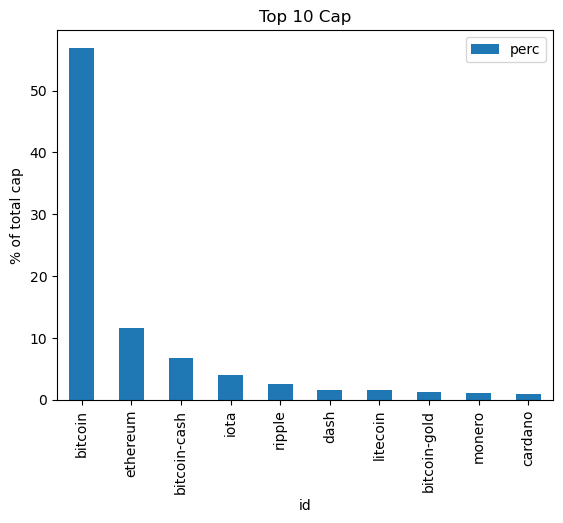

In [77]:
# Plotting the barplot
ax = cap10.plot.bar(x = 'id', y = 'perc',title='Top 10 Cap')
ax.set_ylabel('% of total cap');

Bitcoin is too big, and the other coins are hard to distinguish because of this. Instead of the percentage, let's use a log10 scale of the "raw" capitalization. Plus, let's use color to group similar coins and make the plot more informative

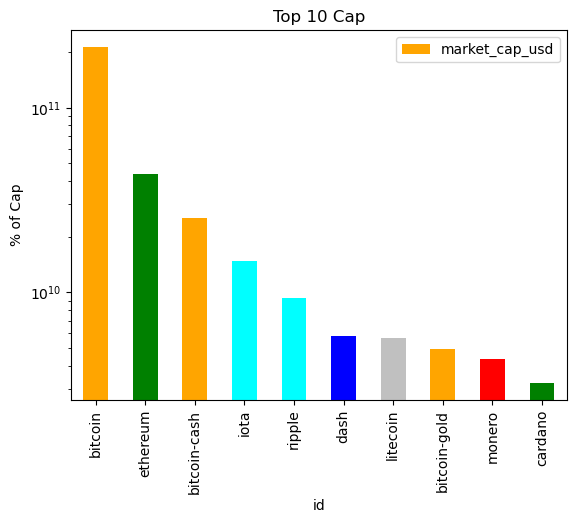

In [86]:
# Colors for the bar plot
COLORS = ['orange', 'green', 'orange', 'cyan', 'cyan', 'blue', 'silver', 'orange', 'red', 'green']

# Plotting market_cap_usd as before but adding the colors and scaling the y-axis  
ax = cap10.plot.bar(x = 'id', y = 'market_cap_usd', logy = True, color = COLORS, title = 'Top 10 Cap')
ax.set_ylabel('% of Cap');

# CryptoCurr Exchange History
The cryptocurrencies market has been spectacularly volatile since the first exchange opened.Let's explore this volatility a bit more! We will begin by selecting and plotting the 24 hours and 7 days percentage change.

In [90]:
df2 = pd.read_csv(r"C:\Users\karim\Desktop\coinmarketcap_06122017.csv",index_col=0)
# Selecting the id, percent_change_24h and percent_change_7d columns
volatility = df2[['id', 'percent_change_24h', 'percent_change_7d']]

# Setting the index to 'id' and dropping all NaN rows
volatility = volatility.set_index('id').dropna()

# Sorting the DataFrame by percent_change_24h in ascending order
volatility = volatility.sort_values('percent_change_24h', ascending = True)
volatility.head()

,percent_change_24h,percent_change_7d
id,,
flappycoin,-95.85,-96.61
credence-coin,-94.22,-95.31
coupecoin,-93.93,-61.24
tyrocoin,-79.02,-87.43
petrodollar,-76.55,542.96


Very dangerous Volatile market indeed.
Let's plot the top 10 biggest gainers and top 10 losers in market capitalization.

In [106]:
# Defining a function with 2 parameters, the series to plot and the title
def top10_u_d (volatility , title):
    # Making the subplot and the figure for two side by side plots
    fig , axes = plt.subplots(nrows = 1 , ncols = 2 ,figsize=(10,6))
    # Plotting top losers 
    ax = volatility[:10].plot.bar(color = 'darkred', ax = axes[0])
    # Setting the figure's main title
    fig.suptitle(title)
    # Setting the ylabel to '% change'
    ax.set_ylabel('% change')
    # top 10 winners
    ax = volatility[-10:].plot.bar(color = 'darkblue', ax = axes[1])
    
    return fig , ax 

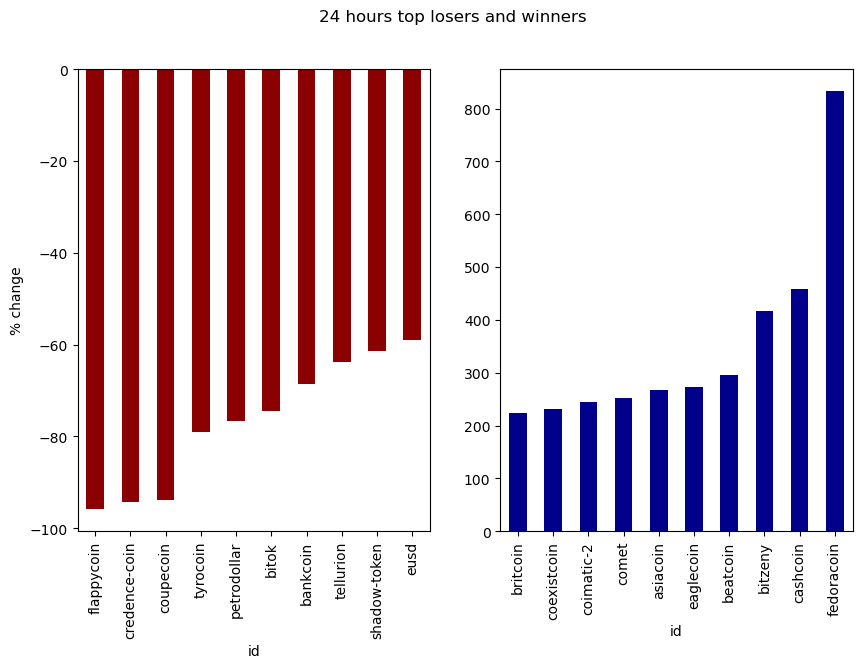

In [107]:
DTITLE = "24 hours top losers and winners"
fig , ax = top10_u_d(volatility.percent_change_24h,DTITLE)  

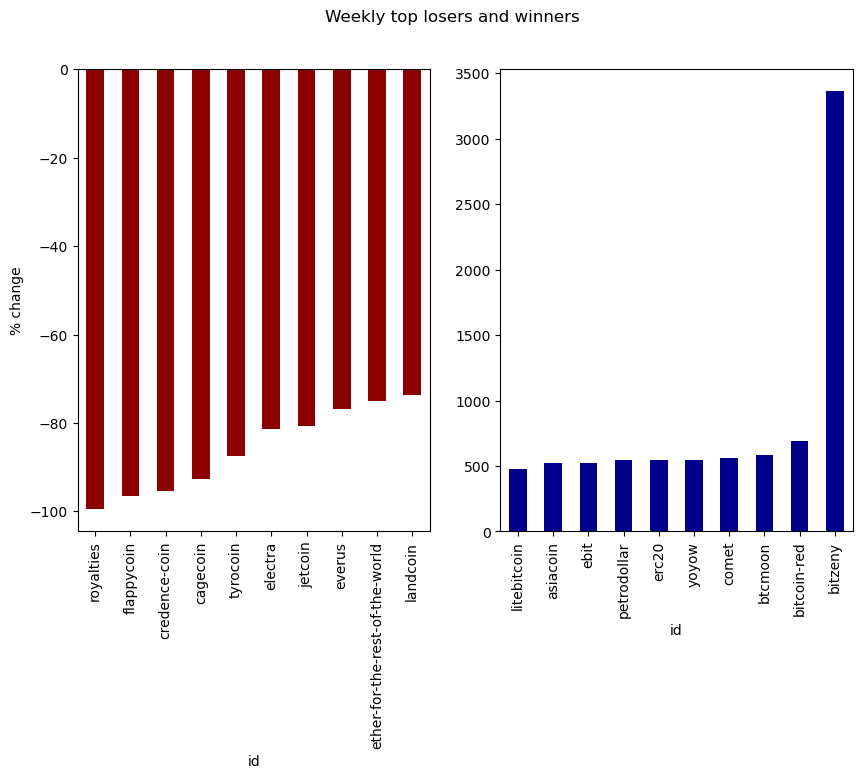

In [108]:
volatility7d = volatility.sort_values('percent_change_7d', ascending = True)

WTITLE = "Weekly top losers and winners"

# Calling the top10_subplot function
fig, ax = top10_u_d(volatility7d.percent_change_7d, WTITLE)

The names of the cryptocurrencies above are quite unknown, and there is a considerable fluctuation between the 1 and 7 days percentage changes. As with stocks, and many other financial products, the smaller the capitalization, the bigger the risk and reward. Smaller cryptocurrencies are less stable projects in general, and therefore even riskier investments than the bigger ones

In [111]:
# Selecting everything bigger than 10 billion 
largecaps = df.query('market_cap_usd > 10000000000')
largecaps

,id,market_cap_usd
0,bitcoin,2.130493e+11
1,ethereum,4.352945e+10
2,bitcoin-cash,2.529585e+10
3,iota,1.475225e+10
